In [8]:
#import apa yang patutimport keras
from tensorflow.keras.models import Model  # Import Model class
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [11]:
model = tf.keras.models.load_model('1.keras')

In [25]:
#declaring datasetdata_dir_test  = r"C:\Users\user\Desktop\test dataset segmented"

image_width  = 256
image_height = 256
batch_size   = 32

In [26]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "Vitato",
    shuffle=True,
    image_size = (image_width,image_height),
    batch_size = batch_size
)

Found 1788 files belonging to 5 classes.


In [27]:
scores = model.evaluate(test_ds)

56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 341ms/step - accuracy: 0.9783 - loss: 0.0608


In [28]:
y_pred = []  # store predicted labels
y_true = []  # store true labels
# iterate over the dataset
for image_batch, label_batch in test_ds:   # use dataset.unbatch() with repeat   # append true labels
   y_true.append(label_batch)   # compute predictions
   preds = model.predict(image_batch)   # append predicted labels
   y_pred.append(np.argmax(preds, axis = - 1))
# convert the true and predicted labels into tensors
correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)
confusion_matrix(predicted_labels, correct_labels)
print(classification_report(correct_labels,predicted_labels))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

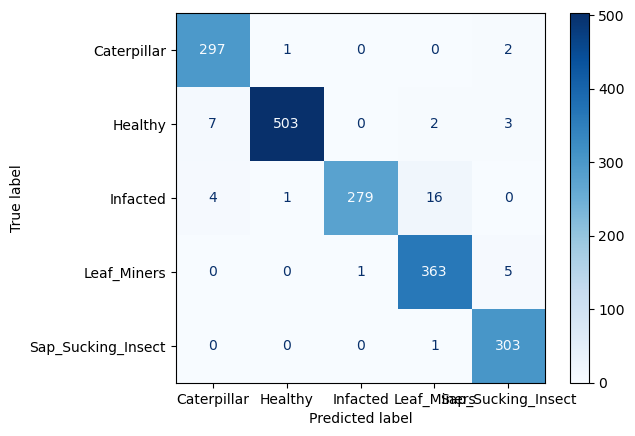

In [29]:
cm = confusion_matrix(correct_labels,predicted_labels)
class_names = ["Caterpillar", "Healthy", "Infacted", "Leaf_Miners", "Sap_Sucking_Insect"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()